In [1]:
import numpy as np
import control as co
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline
sym.init_printing()

In [12]:
import ipywidgets
from ipywidgets import FloatSlider, VBox, HBox, interactive_output
from IPython.display import display

### Order of a system

* The order refers to the order of the equivalent differential equation representing the system
* The order of the denominator of the transfer function after cancellation of common factors in the numerator.
* The number of simultaneous first-order equations required for the state-space representation.

### System Response
**Forced response:** For linear systems, that part of the total response function due to the input. It is typically of the same form as the input and its derivatives.

**Natural response:** That part of the total response function due to the system and the way the system acquires or dissipates energy

The output response of a system is the sum of two responses: the forced response and the natural response.

### Poles of a Transfer Function
The poles of a transfer function are 
1. The values of the Laplace transform variable, s, that cause the transfer function to become infinite or 
2. Any roots of the denominator of the transfer function that are common to roots of the numerator

In general, G(s) is a rational function of the form
$$G(s) = \dfrac {N(s)}{D(s)}$$
When $D(s)=0$ the transfer function become to infinite.Hence the roots of $D(s)$ polynomial is called system poles.<br>
If $G(s)=\dfrac{s+2}{s^2+6s+25}$ then $N(s)=s+2$ and $D(s)=s^2+6s+25$
,

In [2]:
s=co.tf("s")
G=(s+2)/(s**2+6*s+25)
G

TransferFunction(array([1, 2]), array([ 1,  6, 25]))

In [3]:
co.pole(G)

array([-3.+4.j, -3.-4.j])

The system $G(s)=\dfrac{s+2}{s^2+6s+25}$ has two pole at $s=-3+4j$, $-3-4j$

### Zeros of a Transfer Function
The zeros of a transfer function are 
1. The values of the Laplace transform variable, s, that cause the transfer function to become zero or 
2. Any roots of the numerator of the transfer function that are common to roots of the denominator

### Pole-Zero plot

### Poles and Zeros of a First-Order System: An Example
Suppose the system transfer function $$G(s)=\dfrac{s+2}{s+5}$$
If the reference input is $R(s)$ and output response is $C(s)$ in frequency domain then$$C(s)=G(s)R(s)$$
When reference input $R(s)=\dfrac{1}{s}$ the output response $$C(s)=\dfrac{1}{s}\times \dfrac{s+2}{s+5}=\dfrac{s+2}{s(s+5)}$$

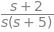

In [4]:
t, s = sym.symbols('t, s')
C=(s+2)/(s*(s+5))
C

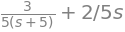

In [5]:
partial_fraction=C.apart(s)
partial_fraction

In [6]:
c_t=sym.inverse_laplace_transform(partial_fraction, s,t)
c_t

So time domain step response of this first order system is $$c(t)=\left [\dfrac{2}{5}+\dfrac{3}{5}\times e^{-5t}\right ]u(t)$$
The pole zero plot of $C(s)=\dfrac{s+2}{s(s+5)}$ is shown bt python code

<IPython.core.display.Javascript object>


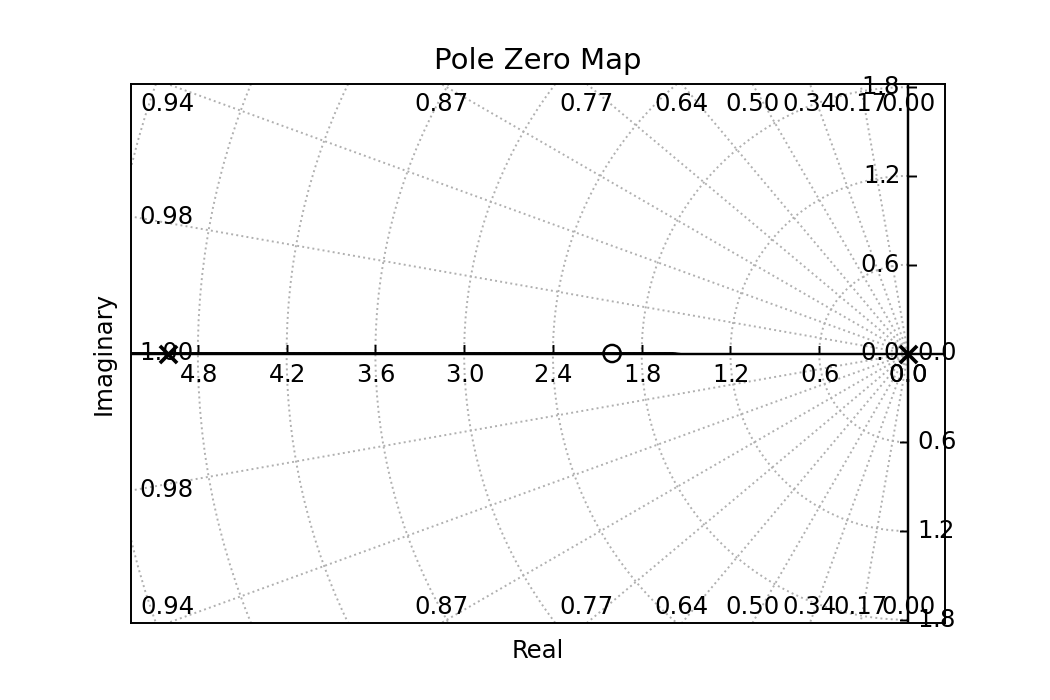

(array([-5.,  0.]), array([-2.]))

In [7]:
s=co.tf("s")
C=(s+2)/(s*(s+5))
plt.figure(1, figsize=(6, 4))
co.pzmap(C, grid=True)

Below figure shows the first order system step response evolution by inspection.
<img src="https://github.com/sayedul79/python-control-system/blob/main/image/first-order-system-response.png?raw=true">

From the above development we draw the following conclusion
1. A pole of the input function generates the form of the forced response (i.e., the pole at the origin generated a step function at the output).

In [8]:
s, t=sym.symbols('s, t')
pole_origin=1/s
inv_lap=sym.inverse_laplace_transform(pole_origin, s, t)
inv_lap

<IPython.core.display.Javascript object>


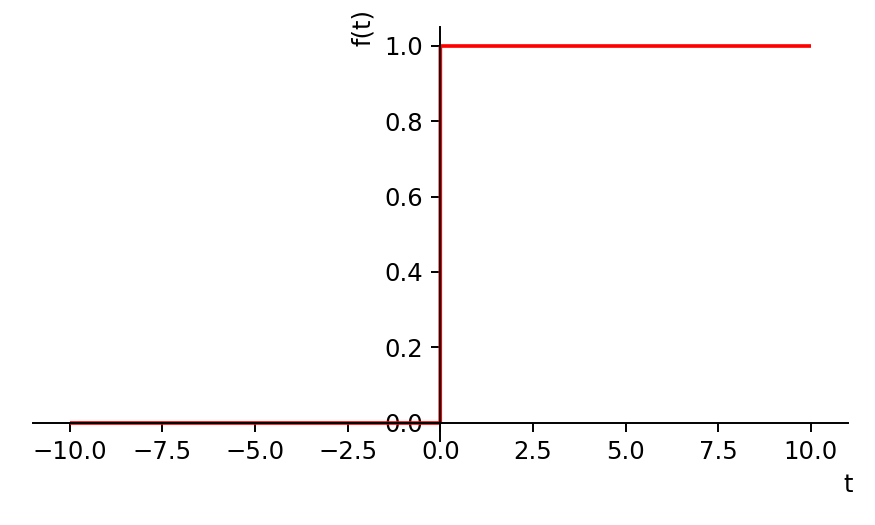

In [9]:
sym.plot(inv_lap, line_color="red", 
         size=(5,3))

2. A pole of the transfer function generates the form of the natural response (i.e., the pole at −5 generated $e^{−5t}$).

In [10]:
s, t=sym.symbols("s, t")
pole_real_axis=1/(s-5)
inv_lap=sym.inverse_laplace_transform(pole_real_axis, s, t)
inv_lap

<IPython.core.display.Javascript object>


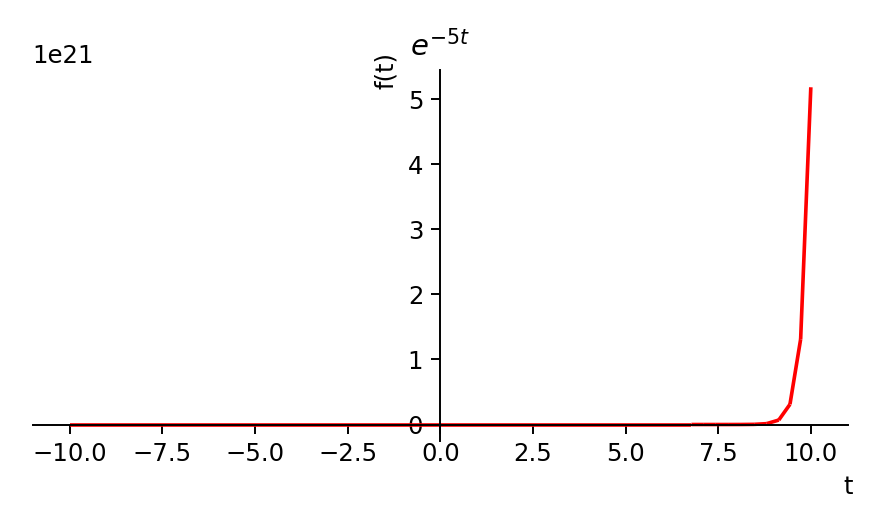

In [11]:
sym.plot(inv_lap, line_color="red", size=(5,3), 
        title=r'$e^{-5t}$')

3. A pole on the real axis generates an exponential response of the form $e^{−αt}$, where −α is the pole location on the real axis. Thus, the farther to the left a pole is on the negative real axis, the faster the exponential transient response will decay to zero (again, the pole at −5 generated $e^{−5t}$.

In [62]:
def decay_interact(a=0):
    t=np.arange(0,5, .01)
    y=np.exp(a*t)
    plt.figure(4,figsize=(8,5))
    ax=plt.axes()
    ax.plot(t, y, color="red",
             linewidth=2,
             label=fr"$a={a}$")
    #move left y axis and bottom x axis to center (0,0)
    ax.spines["left"].set_position("zero")
    ax.spines["bottom"].set_position("zero")
    #Eliminate upper and right axes
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.grid()
    ax.legend()

In [67]:
%matplotlib inline
a=FloatSlider(value=-3, min=-8, max=-0.8, step=0.2, description="a")
plot_interact=interactive_output(decay_interact, {"a":a})
layout=VBox([a, plot_interact])
display(layout)

<img src="https://github.com/sayedul79/python-control-system/blob/main/image/effefct-of-real-axis-pole-upon-transient-response.png?raw=true">
Each pole of the system transfer function that is on the real axis
generates an exponential response that is a component of the natural response. The
input pole generates the forced response.


4. The zeros and poles generate the amplitudes for both the forced and natural responses .

### Evaluating Response Using Poles
